# Quick Start

> Minimal Example of StatsForecast

`StatsForecast` follows the sklearn model API. For this minimal example, you will create an instance of the StatsForecast class and then call its `fit` and `predict` methods. We recommend this option if speed is not paramount and you want to explore the fitted values and parameters. 

:::{.callout-tip}
If you want to forecast many series, we recommend using the `forecast` method. Check this [Getting Started with multiple time series](./2_Getting_Started_complete.ipynb) guide. 
:::

The input to StatsForecast is always a data frame in [long format](https://www.theanalysisfactor.com/wide-and-long-data/) with three columns: `unique_id`, `ds` and `y`:

* The `unique_id` (string, int or category) represents an identifier for the series. 

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast. 


As an example, let’s look at the US Air Passengers dataset. This time series consists of monthly totals of a US airline passengers from 1949 to 1960. The CSV is available [here](https://www.kaggle.com/datasets/chirag19/air-passengers).

We assume you have StatsForecast already installed. Check this guide for instructions on [how to install StatsForecast](./0_Installation.ipynb).

First, we’ll  import the data:

In [ ]:
# uncomment the following line to install the library
# %pip install statsforecast

In [ ]:
import os

import pandas as pd

In [ ]:
# this makes it so that the outputs of the predict methods have the id as a column 
# instead of as the index
os.environ['NIXTLA_ID_AS_COL'] = '1'

In [ ]:
df = pd.read_csv('https://datasets-nixtla.s3.amazonaws.com/air-passengers.csv', parse_dates=['ds'])
df.head()

,unique_id,ds,y
0,AirPassengers,1949-01-01,112
1,AirPassengers,1949-02-01,118
2,AirPassengers,1949-03-01,132
3,AirPassengers,1949-04-01,129
4,AirPassengers,1949-05-01,121


We fit the model by instantiating a new `StatsForecast` object with its two required parameters:
https://nixtla.github.io/statsforecast/src/core/models.html
* `models`: a list of models. Select the models you want from [models](../../src/core/models.ipynb) and import them. For this example, we will use a `AutoARIMA` model. We set `season_length` to 12 because we expect seasonal effects every 12 months. (See: [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/))

* `freq`: a string indicating the frequency of the data. (See [pandas available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).)

Any settings are passed into the constructor. Then you call its fit method and pass in the historical data frame.

:::{.callout-note}
StatsForecast achieves its blazing speed using JIT compiling through Numba. The first time you call the statsforecast class, the fit method should take around 5 seconds. The second time -once Numba compiled your settings- it should take less than 0.2s. 
:::


In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

sf = StatsForecast(
    models=[AutoARIMA(season_length = 12)],
    freq='M',
)

sf.fit(df)

StatsForecast(models=[AutoARIMA])

The `predict` method takes two arguments: forecasts the next `h` (for horizon) and `level`.

* `h` (int): represents the forecast h steps into the future. In this case, 12 months ahead. 

* `level` (list of floats): this optional parameter is used for probabilistic forecasting. Set the `level` (or confidence percentile) of your prediction interval. For example, `level=[90]` means that the model expects the real value to be inside that interval 90% of the times. 

The forecast object here is a new data frame that includes a column with the name of the model and the y hat values, as well as columns for the uncertainty intervals.

In [ ]:
forecast_df = sf.predict(h=12, level=[90])
forecast_df.tail()

,unique_id,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90
7,AirPassengers,1961-07-31,633.230774,589.562378,676.899170
8,AirPassengers,1961-08-31,535.230774,489.082153,581.379456
9,AirPassengers,1961-09-30,488.230804,439.728699,536.732910
10,AirPassengers,1961-10-31,417.230804,366.484253,467.977356
11,AirPassengers,1961-11-30,459.230804,406.334930,512.126648


You can plot the forecast by calling the `StatsForecast.plot` method and passing in your forecast dataframe.


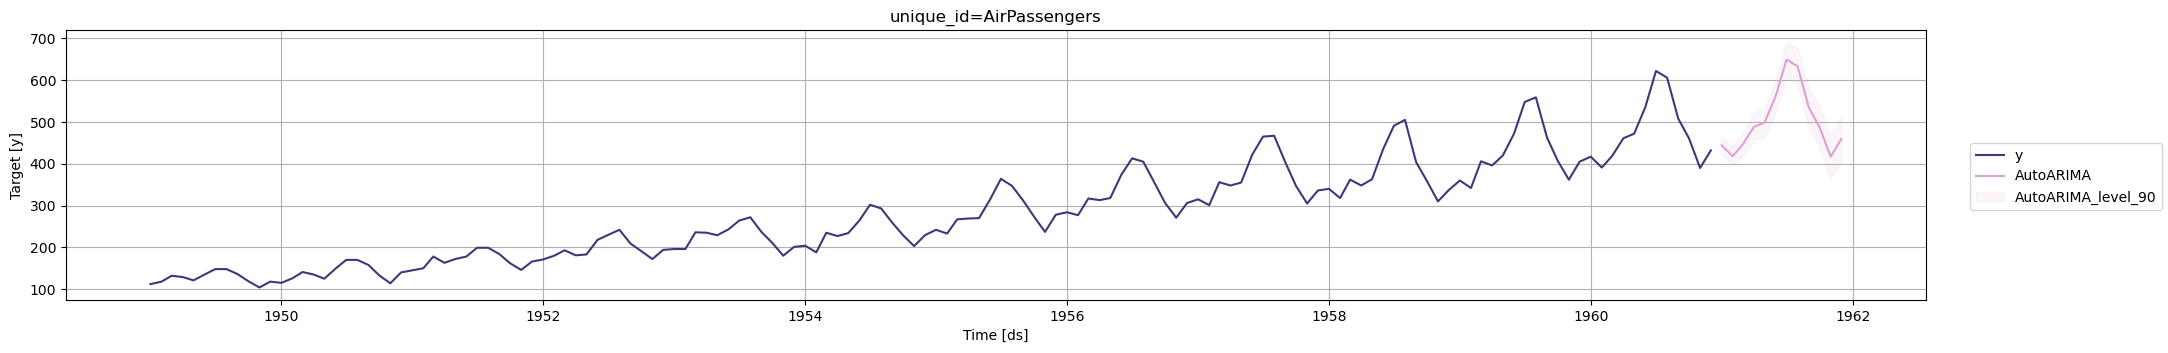

In [ ]:
sf.plot(df, forecast_df, level=[90])

:::{.callout-tip}
## Next Steps

* Build and end-to-end forecasting pipeline following best practices in [End to End Walkthrough](./2_Getting_Started_complete.ipynb)
* [Forecast millions of series](../how-to-guides/Prophet_spark_m5.ipynb) in a scalable cluster in the cloud using Spark and Nixtla
* [Detect anomalies](../tutorials/AnomalyDetection.ipynb) in your past observations
:::